# Integração numérica

De modo geral vemos em cálculo que a integral de uma função é dada por:

$$\int_{a}^{b} f(x) dx = \lim_{x\to\infty} \sum_{n=1}^{\infty} f(x_n) \Delta x $$

Numéricamente o que fazemos é basicamente truncar a somatória acima em um N finito. A precisão obtida é dependente do valor de N adotado.



## A regra dos trapézios

Um exemplo simples da integração numérica usando a regra dos trapézios:




A área de um único trapézio entre os pontos $x_j$ and $x_{j+1}$ é dada por:
$$ \frac{h}{2} (f(x_j) + f(x_{j+1})). $$

Somando isso sobre $n$ trapezóides em um dado intervalo [a,b] temos:

$$ h\left(\frac 1 2 f(x_0) + f(x_1) + f(x_2) + \cdots + f(x_{n-2}) + \frac 1 2 f(x_{n-1})\right) = h\sum_{j=0}^{n-1} f(x_j) - \frac h 2 \left(f(x_0) + f(x_{n-1})\right) =  h\sum_{j=0}^{n-1} f(x_j) + \frac h 2 \left(f(a) + f(b))\right). $$


In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Primeiro definimos a função para qual desejamos obter o valor da integral:

In [21]:
def f(x):
    return (x-3)*(x-5)*(x-7)+85

Para podermos fazer o gráfico mostrando a função e os trapézios utilizados na integração, amostramos a função entre 0 e 10 utilizando 200 pontos:

In [22]:
x = np.linspace(0, 10, 200)
y = f(x)

defina a região onde se quer integrar e o numero de trapézios a usar

In [33]:
a, b = 1, 8                     # define os limnites de integração

ndiv = 5                        # numero de pontos a serem utilizados
xint = np.linspace(a,b,ndiv)    # cria um vetor com ndiv elementos entre os limites de integração
yint = f(xint)                  # calcula o valor da função nos pontos do vetor acima

print(xint)
print(yint)

[ 1.    2.75  4.5   6.25  8.  ]
[  37.         82.609375   86.875      81.953125  100.      ]


plotamos a curva e os trapézios usados para a integração

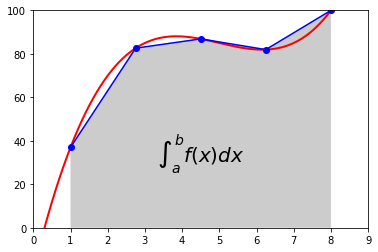

In [34]:
plt.plot(x, y, lw=2,color='r')
plt.axis([a-1, b+1, 0, max([f(a),f(b)])])
plt.fill_between(xint, 0, yint, facecolor='gray', alpha=0.4)
plt.text(0.5 * (a + b), 30,r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=20);

plt.plot(xint,yint,'bo-')


O erro para a estimativa da integral pelo método dos trapézios é dado por:

$$ \text{erro} = -\frac{(b-a)^2}{12N^2} \big[ f'(b)-f'(a) \big] + O(N^{-3}) $$

ou 

$$ \text{erro} = \frac{h^2}{12} \big[ f'(a)-f'(b) \big] + O(h^4) $$


Vemos por essa expressão que o método dos trapézios é o que consideramos como de primeira ordem pois é acurado até termos com $h$ e com erro da ordem de $h^2$

No contexto da física computacional é importante também levar em conta o erro de arredondamento. Atualmente em Python esse erro é da ordem de $10^{-16}$. Isso significa que apesar do erro diminuir com o aumento da subdivisão do intervalo de integração, existe um limite dado pelo erro de arredondamento da máquina.

Usando as funções nativas do SciPy fazemos a conta usando quadratura e os trapézios

In [35]:
from scipy.integrate import quad, trapz
integral, error = quad(f, a, b)
print "Integral por quadratura:", integral, "+/-", error
print "Integral usando ", len(xint)-1, "trapezóides:", trapz(yint, xint)

Integral por quadratura: 565.25 +/- 6.27553564669e-12
Integral usando  4 trapezóides: 559.890625


## Método de Simpson

O método de Simpson utiliza uma aproximação mais sofisticada para o intervalo a ser integrado

neste método se aproxima a função no intervalo [a,b] por um polinômio de segundo grau. Esse polinomio, conhecido como polinomio interpolador de Lagrange, tem o mesmo valor de $f(x)$ nos pontos a, b:

$$P(x)=f(a){\tfrac {(x-m)(x-b)}{(a-m)(a-b)}}+f(m){\tfrac {(x-a)(x-b)}{(m-a)(m-b)}}+f(b){\tfrac {(x-a)(x-m)}{(b-a)(b-m)}}.$$

Usando este polinomio calculado no ponto médio $m = (a + b) / 2$ e efetuando a sua integração obtem-se:

$$ \int _{a}^{b}f(x)\,dx\approx {\tfrac {b-a}{6}}\left[f(a)+4f\left({\tfrac {a+b}{2}}\right)+f(b)\right] $$

Essa expressão pode ser expandida para vários intervalos como foi feito para a regra dos trapézios:

$$ \int _{a}^{b}f(x)\,dx\approx {\tfrac  {h}{3}}{\bigg [}f(a)+2\sum _{{j=1}}^{{n/2-1}}f(x_{{2j}})+4\sum _{{j=1}}^{{n/2}}f(x_{{2j-1}})+f(b){\bigg ]},$$



[1.   2.75 4.5 ] [37.       82.609375 86.875   ]
Fit coeficients        2
-6.75 x + 51.38 x - 7.625
[4.5  6.25 8.  ] [ 86.875     81.953125 100.      ]
Fit coeficients       2
3.75 x - 43.12 x + 205


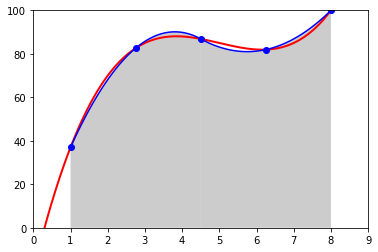

In [21]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def f(x):
#    return (x-3.)*(x-5.)+10.
    return (x-3.)*(x-5.)*(x-7)+85.
#    return 60 + x**3 + 50*np.sin(5.*x)

x = np.linspace(0, 10, 400)
y = f(x)

a, b = 1., 8.                     # define os limnites de integração

ndiv = 4                        # numero de divisões a serem utilizadas DEVE SER PAR!
xint = np.linspace(a,b,ndiv+1)    # cria um vetor com ndiv elementos entre os limites de integração
yint = f(xint)                  # calcula o valor da função nos pontos do vetor acima


plt.plot(x, y, lw=2,color='r')
plt.axis([a-1, b+1, 0, max([f(a),f(b)])])
plt.plot(xint,yint,'bo')


for i in range(0,ndiv,2):
    xfit = np.array([xint[i],(xint[i]+xint[i+2])/2,xint[i+2]])
    yfit = f(xfit)
    print (xfit,yfit)
    
    # usando ajuste polynomial
    #z = np.polyfit(xfit, yfit, 2)
    
    # using Lagrange interpolator    
    z = lagrange(xfit, yfit)
    
    print("Fit coeficients", z)
    
    fit = np.poly1d(z)
    
    xnew = np.linspace(xfit[0], xfit[2], 50)
    ynew = fit(xnew)
    
    plt.plot(xnew,ynew,color='b')
    plt.fill_between(xnew, 0, ynew, facecolor='gray', alpha=0.4)

    

## Erro do método

Pode-se mostrar que o erro cometido pelo método de Simpson é:

${\tfrac  {1}{90}}\left({\tfrac  {b-a}{2}}\right)^{5}\left|f^{{(4)}}(\xi )\right|$

onde $f^{{(4)}}(\xi )$ é a quarta derivada da função calculada em algum ponto $\xi$ no intervalo $[a,b]$ de integração. Estas estimativas são obtidas através de expansão de Taylor da função em torno do ponto médio do intervalo de integração usado. 

Note que com isso o método de Simpson fornece soluções exatas para polinômios quadráticos ou menor.

![erros](erros-integracao.png)

## Erros na prática

Para obter estimativas de erros em situações onde temos dados tabelados e não funções definidas, podemos usar a comparação de resultados obtidos com refinamentos sucessivos.

Usando as formulas de erros mostradas anteriormente pode-se mostrar que:

$\epsilon_i = \frac{1}{3}\left| I_i-I_{i-1} \right| $

para a regra dos trapézios e 

$\epsilon_i = \frac{1}{15}\left| I_i-I_{i-1} \right| $

para o método de Simpson.

## Métodos de integração de ordem maior

O método dos trapézios usa um polinomio interpolador de primeira ordem. O método de simpson um interpolador de segunda ordem. Podemos usar polinomios interpoladores de qualquer ordem com o objetivo de obter estimativas mais precisas das integrais. 

Regras de integração de ordens maiores são geralmente conhecidas como fórmulas de Newton-Cotes. Veja mais detalhes em: https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas

Estes métodos tem em comum o espaçamento uniforme dos pontos que dividemo intervalo de integração. No entanto podemos pensar em interpoladores que tomam pontos não igualmente espaçados e que podem se situar em regiões que levam a maior precisão da estimativa da integral. Uma solução seria usar pontos de modo adaptativo, sendo mais numerosos em regiões onde a função apresente grande variação.

Uma das melhores maneiras de se obter uma integração precisa é usando o método da Quadratura Gaussiana: https://en.wikipedia.org/wiki/Gaussian_quadrature

De um modo geral, nos métodos de ordem maior a integral é estimada com ordem (N-1) de precisão usando:

$$\int _{-1}^{1}f(x)\,dx=\sum _{i=1}^{n}w_{i}f(x_{i}).$$

onde $w_{i}$ são pesos determinados pelos polinomios interpoladores.

No caso da Quadratura Gaussiana permite-se usar pontos não necessáriamente espaçados igualmente e portanto, sendo N pontos, ganha-se mais N graus de liberdade o que leva a uma precisão de (2N-1)



## Integrais multiplas

Integrais multiplas são bastante comuns em problemas de física e sua resolução numérica se dá através da aplicação das técnicas discutidas acima.

De modo geral temos:

$$ I = \int\int f(x,y)\,dxdy $$

podemos resolver esta integral usando:

$$ F(y) = \int f(x,y)\,dx $$

e

$$ I = \int F(y)\,dy $$

na pratica executaremos duas somas:

$$F(y)\approx \sum _{i=1}^{N}w_{i}f(x_{i},y).$$

e $$ I \approx \sum _{j=1}^{N}w_{j}F(y_{i}).$$

essa formulação permite também ter intervalos de inetgração que são funções.

Exemplo usando método dos trapézios: 

Vamos calcular a integral dupla dada por:

$$ I = \int_a^b \int_c^d f(x,y) dydx = \int_a^b g(x)dx,\quad
g(x) = \int_c^d f(x,y) dy\thinspace .$$

Na pratica calculamos primeiro g(x) em um dado ponto $x_i$:

$$ g(x_i) = \int_c^d f(x_i,y) dy \approx  h_y \sum_{j=0}^{n_y-1} f(x_i,y_j) + \frac{h_y}{2} \left(f(x_i,c) + f(x_i,d))\right) $$

e psteriormente calculamos a integral final:

$$ I = \int_a^b g(x) dx \approx  h_x \sum_{i=0}^{n_x-1} g(x_i) + \frac {h_x} 2 \left(g(a) + g(b))\right) $$


In [1]:
import numpy as np

# definindo uma função para calculo de integral dupla

def int_dupla(f, a, b, c, d, nx, ny):
    hx = (b - a)/float(nx)
    hy = (d - c)/float(ny)
    xint = np.linspace(a,b,nx)
    yint = np.linspace(c,d,ny)
    gx = np.zeros(nx)
    I = 0
    
    for i in range(nx):
        for j in range(ny):
            gx[i] += hy*f(xint[i], yint[j]) 
            
        gx[i] = gx[i] + hy/2.*(f(xint[i], c) + f(xint[i], d))
            
        I += hx*gx[i]
        
    I = I + hx/2.*(gx[0] + gx[nx-1])
        
    return I 

# definindo uma função para calculo de integral dupla usando tecnica do ponto médio
# ver https://en.wikipedia.org/wiki/Riemann_sum

def pm_dupla(f, a, b, c, d, nx, ny):
    hx = (b - a)/float(nx)
    hy = (d - c)/float(ny)
    I = 0
    for i in range(nx):
        for j in range(ny):
            xi = a + hx/2 + i*hx
            yj = c + hy/2 + j*hy
            I += hx*hy*f(xi, yj)
    return I

# função para testar
#def f(x, y):
#    return 2*x + y

# 0.886226925453
def f(z,x):
    return np.exp(-z**2/(1-z)**2)/(1-z)**2

sz = 500
I1 = int_dupla(f, 0, 2, 2, 3, sz,sz)
I2 = pm_dupla(f, 0, 2, 2, 3, sz,sz)

print(I1,I2)

# O que acontece quando os limites estão em pontos singulares
print(int_dupla(f, -1, 1, -1, 1, sz,sz))

0.8944476794167258 0.890373769055464
2.6964302426115094


## Pacotes Scipy para integração

O principal módulo de computação científica do Python tem um conjunto de pacotes específico para efetuar integração numérica. 

Existem pacotes tanto para integração de funções definidas por equações quanto para aquelas definidas por pontos tabulados.

Mais detalhes de cada função de integração e em que casos se encaixam estão em:

https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

## Exercícios:



#### 1 - Escreva uma função em python que calcule a integral pelo método dos trapézios, utilizando um looping "FOR" para calcular a somatória. Com essa função calcule as integrais das funções abaixo:

$$a)~ (x-3)*(x-5)*(x-7)+85 ~~~com~a=1~e~b=9\\
  b)~f_2(x) = 1 + x^3 + \sin(kx)~~~com~a=0~e~b=2$$
  
  onde $k$ é um parametro.
  
  - Faça uma análise dos erros cometidos a medida que se aumenta o numero de intervalos. Para o numero de intervalos utilize a seginte sequencia: [5, 10, 20, 40, 80, 160, 320]. Utilize gráficos para mostrar seus resultados.
  
  - Tente usar a função SUM para escrever uma outra versão da função de calculo via trapézios.

Sua função deve ser algo como:

```python
def trapezoidal(f, a, b, N):
    """Essa função integra uma função f de a até b usando N intervalos."""
    # seu código aqui.
```

# Referencias

Uma fonte de referencia muito boa para esse tema é a página da wikipédia:

https://en.wikipedia.org/wiki/Numerical_integration

https://en.wikipedia.org/wiki/Simpson%27s_rule
